In [ ]:
# Import
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
import keras

Using TensorFlow backend.


In [ ]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense,Activation,Layer,Lambda

from sklearn.cross_validation import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

X_trainall=pd.read_csv('C:/Users\lenovo\AnacondaProjects\learning-to-rank-master\experiments/sample.txt',sep=','
                    ,header=None,names=['profile','tweet_id','JM','Diri','BM25','Class'])
X_trainall.head()

scaler = StandardScaler()
X_trainall['JM'] = scaler.fit_transform(X_trainall[['JM']])
X_trainall['Diri'] = scaler.fit_transform(X_trainall[['Diri']])
X_trainall['BM25'] = scaler.fit_transform(X_trainall[['BM25']])       
X_trainall.head()


X_test=pd.read_csv('C:/Users\lenovo\AnacondaProjects\learning-to-rank-master\experiments/gtest.txt',sep=','
                    ,header=None,names=['profile','tweet_id','JM','Diri','BM25','Class'])
X_test.head()

scaler = StandardScaler()
X_test['JM'] = scaler.fit_transform(X_test[['JM']])
X_test['Diri'] = scaler.fit_transform(X_test[['Diri']])
X_test['BM25'] = scaler.fit_transform(X_test[['BM25']])       
X_test.head()


X_trainall['Class']=np.where(X_trainall['Class'] ==2,1, X_trainall['Class'])
X_test['Class']=np.where(X_test['Class'] ==-2,0, X_test['Class'])
X_test['Class']=np.where(X_test['Class'] ==2,1, X_test['Class'])

In [ ]:
print(X_trainall['Class'].value_counts())
X_train0=X_trainall[X_trainall['Class']==0]
X_train1=X_trainall[X_trainall['Class']==1]
X_train0.info()
X_train1.info()
X_train0=X_train0.sample(3029)
X_train0.info()
X_trainws=pd.concat([X_train0,X_train1])



0    34799
1     3029
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 34799 entries, 0 to 37827
Data columns (total 6 columns):
profile     34799 non-null object
tweet_id    34799 non-null int64
JM          34799 non-null float64
Diri        34799 non-null float64
BM25        34799 non-null float64
Class       34799 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 156 to 37705
Data columns (total 6 columns):
profile     3029 non-null object
tweet_id    3029 non-null int64
JM          3029 non-null float64
Diri        3029 non-null float64
BM25        3029 non-null float64
Class       3029 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 165.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 19668 to 700
Data columns (total 6 columns):
profile     3029 non-null object
tweet_id    3029 non-null int64
JM          3029 non-null float

In [ ]:
df = pd.DataFrame({"D1":range(5), "D2":range(5)})
print(df)
df2 = df.reindex(np.random.permutation(df.index))
print(df2)

   D1  D2
0   0   0
1   1   1
2   2   2
3   3   3
4   4   4
   D1  D2
3   3   3
1   1   1
0   0   0
4   4   4
2   2   2


In [ ]:
X_train = X_trainws.reindex(np.random.permutation(X_trainws.index))


In [ ]:
X_train.info()
X_trainws.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6058 entries, 27934 to 31192
Data columns (total 6 columns):
profile     6058 non-null object
tweet_id    6058 non-null int64
JM          6058 non-null float64
Diri        6058 non-null float64
BM25        6058 non-null float64
Class       6058 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 331.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6058 entries, 19668 to 37705
Data columns (total 6 columns):
profile     6058 non-null object
tweet_id    6058 non-null int64
JM          6058 non-null float64
Diri        6058 non-null float64
BM25        6058 non-null float64
Class       6058 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 331.3+ KB


,profile,tweet_id,JM,Diri,BM25,Class
27934,RTS25,763267446211907584,1.442579,-0.371512,1.457239,0
16825,MB409,763735538931228672,1.332244,2.144493,1.336395,1
15533,MB391,761608699672690688,-0.606243,-0.103754,-0.787672,1
20966,MB438,761721971017125889,-0.672444,-0.274565,-0.834150,0
7695,MB286,763539547493838849,-1.113781,-1.373298,-1.222246,0


In [ ]:
test_df = pd.read_csv('C:/Users\lenovo\AnacondaProjects\learning-to-rank-master\experiments/runfile/temp.txt',sep=','
                    ,header=None,names=['date','profile','tweet_id','rank','score','JM','Diri','BM25','prediction','Class'])
scaler = StandardScaler()
test_df['JM'] = scaler.fit_transform(test_df[['JM']])
test_df['Diri'] = scaler.fit_transform(test_df[['Diri']])
test_df['BM25'] = scaler.fit_transform(test_df[['BM25']])       

test_df['Class']=np.where(test_df['Class'] ==-1,0, test_df['Class'])
test_df['Class']=np.where(test_df['Class'] ==2,1, test_df['Class'])
print (test_df['Class'].value_counts())
test_df.info()
test_df.head()

0    12066
1      952
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13018 entries, 0 to 13017
Data columns (total 10 columns):
date          13018 non-null int64
profile       13018 non-null object
tweet_id      13018 non-null int64
rank          13018 non-null int64
score         13018 non-null float64
JM            13018 non-null float64
Diri          13018 non-null float64
BM25          13018 non-null float64
prediction    13018 non-null float64
Class         13018 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 1017.1+ KB


,date,profile,tweet_id,rank,score,JM,Diri,BM25,prediction,Class
0,20170804,RTS47,893532395030196224,1,1.00,1.941409,0.925523,2.237589,0.922,1
1,20170804,RTS47,893319966132514816,2,1.00,1.692350,0.915749,1.268197,0.910,1
2,20170804,RTS47,893268233578532864,3,0.80,1.216536,0.133855,0.360471,0.505,1
3,20170804,RTS47,893573742487629824,4,0.75,0.339254,-0.032298,1.497595,-0.017,1
4,20170804,RTS47,893484068276506624,5,0.70,0.090195,-0.242432,-0.167391,-0.040,0


In [ ]:
X=X_train.drop(["profile",'tweet_id','Class'],axis=1)
#X=X_train.drop(["Profile"],axis=1)

y=X_train["Class"]

#Xt=X_test.drop(["profile",'tweet_id','Class'],axis=1)
#X=X_train.drop(["Profile"],axis=1)
Xt=test_df[['JM','Diri','BM25']]
yt=test_df["Class"]


In [ ]:
trainX, trainY = X, y
testX,  testY = Xt, yt

#trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=42)

In [ ]:
#hein?? what is all this??
def getModel(arr):
    model=Sequential()
    for i in range(len(arr)):
        if i!=0 and i!=len(arr)-1:
            if i==1:
                model.add(Dense(arr[i],input_dim=arr[0],kernel_initializer='normal', activation='relu'))
            else:
                model.add(Dense(arr[i],activation='relu'))
    model.add(Dense(arr[-1],kernel_initializer='normal',activation="sigmoid"))
    model.compile(loss="binary_crossentropy",optimizer='rmsprop',metrics=['accuracy'])
    return model

In [ ]:
#firstModel=getModel([30,50,1])
firstModel=getModel([3,6,1])


In [ ]:
import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
class PlotLosses(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.legend()
        plt.show();
        
plot_losses = PlotLosses()

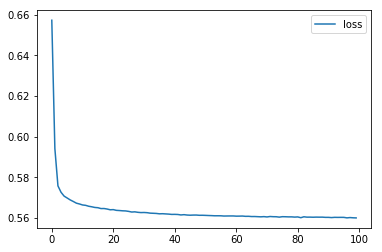

6058/6058 [==============================] - 1s - loss: 0.5601 - acc: 0.7257     


In [ ]:
firstModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])


In [ ]:
scores=firstModel.evaluate(np.array(valX),np.array(valY))


NameError: name 'valX' is not defined

In [ ]:
print("Loss:",scores[0])
print("Accuracy",scores[1]*100)

NameError: name 'scores' is not defined

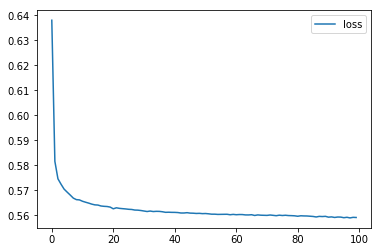

6058/6058 [==============================] - 0s - loss: 0.5591 - acc: 0.7283     


In [ ]:
#secondModel=getModel([30,100,1])
secondModel=getModel([3,10,1])
secondModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])

In [ ]:
scores2=secondModel.evaluate(np.array(valX),np.array(valY))


 928/1212 [=====================>........] - ETA: 0s

In [ ]:
print(scores2)


[0.56534723086719074, 0.71782178198150282]


In [ ]:
#thirdModel=getModel([30,50,70,40,1])
thirdModel=getModel([3,5,7,4,1])

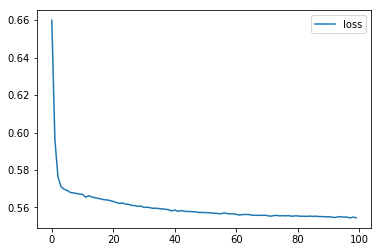

6058/6058 [==============================] - 0s - loss: 0.5545 - acc: 0.7294     


In [ ]:
thirdModel.fit(np.array(trainX),np.array(trainY),epochs=100,callbacks=[plot_losses])


In [ ]:
scores3=thirdModel.evaluate(np.array(valX),np.array(valY))


 864/1212 [====================>.........] - ETA: 0s

In [ ]:
print(scores3)


[0.56296281491962596, 0.72194719511290195]


In [ ]:
predY=firstModel.predict(np.array(testX))
#predY=secondModel.predict(np.array(testX))#
#predY=thirdModel.predict(np.array(testX))

predY=np.round(predY).astype(int).reshape(1,-1)[0]

In [ ]:
len(testY)

13018

In [ ]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY,testY)
tn, fn, fp, tp=confusion_matrix(predY,testY).ravel()
m=pd.crosstab(predY,testY)
print("Confusion matrix")
print(m)


Confusion matrix
Class     0    1
row_0           
0      9368  366
1      2698  586


In [ ]:
test_df['pred_class']= predY
print (test_df['pred_class'].value_counts())
testY.head()
#print (testY['Class'].value_counts())
test_df.head()
test_df['Q0']='Q0'
test_df['tag']='IRLAB-LDRP'
log_df = test_df[test_df['pred_class']==1]
log_df=log_df[['date','profile','Q0','tweet_id','rank','score','tag']]
log_df.to_csv('D:/datas/2017output/result/lr-res/ANN361poinwise.txt',encoding='UTF-8',index=False,sep=' ',header=None)
log_df.head()

0    9389
1    3629
Name: pred_class, dtype: int64


,date,profile,Q0,tweet_id,rank,score,tag
0,20170804,RTS47,Q0,893532395030196224,1,1.00,IRLAB-LDRP
1,20170804,RTS47,Q0,893319966132514816,2,1.00,IRLAB-LDRP
2,20170804,RTS47,Q0,893268233578532864,3,0.80,IRLAB-LDRP
20,20170805,RTS47,Q0,893973753255907329,2,1.00,IRLAB-LDRP
21,20170805,RTS47,Q0,893643619579695104,3,0.99,IRLAB-LDRP


In [ ]:
predY2=secondModel.predict(np.array(testX))#
#predY=thirdModel.predict(np.array(testX))

predY2=np.round(predY2).astype(int).reshape(1,-1)[0]
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY2,testY)
tn, fn, fp, tp=confusion_matrix(predY2,testY).ravel()
m=pd.crosstab(predY2,testY)
print("Confusion matrix")
print(m)
test_df['pred_class']= predY2
print (test_df['pred_class'].value_counts())
testY.head()
#print (testY['Class'].value_counts())
test_df.head()
test_df['Q0']='Q0'
test_df['tag']='IRLAB-LDRP'
log_df = test_df[test_df['pred_class']==1]
log_df=log_df[['date','profile','Q0','tweet_id','rank','score','tag']]
log_df.to_csv('D:/datas/2017output/result/lr-res/ANN3101poinwise.txt',encoding='UTF-8',index=False,sep=' ',header=None)
log_df.head()

Confusion matrix
Class     0    1
row_0           
0      9255  353
1      2811  599


NameError: name 'predY3' is not defined

In [ ]:
predY3=thirdModel.predict(np.array(testX))

predY3=np.round(predY3).astype(int).reshape(1,-1)[0]
from sklearn.metrics import confusion_matrix
m=confusion_matrix(predY3,testY)
tn, fn, fp, tp=confusion_matrix(predY3,testY).ravel()
m=pd.crosstab(predY3,testY)
print("Confusion matrix")
print(m)

test_df['pred_class']= predY3
print (test_df['pred_class'].value_counts())
testY.head()
#print (testY['Class'].value_counts())
test_df.head()
test_df['Q0']='Q0'
test_df['tag']='IRLAB-LDRP'
log_df = test_df[test_df['pred_class']==1]
log_df=log_df[['date','profile','Q0','tweet_id','rank','score','tag']]
log_df.to_csv('D:/datas/2017output/result/lr-res/ANN35471poinwise.txt',encoding='UTF-8',index=False,sep=' ',header=None)
log_df.head()

Confusion matrix
Class     0    1
row_0           
0      9674  374
1      2392  578
0    10048
1     2970
Name: pred_class, dtype: int64


,date,profile,Q0,tweet_id,rank,score,tag
0,20170804,RTS47,Q0,893532395030196224,1,1.0,IRLAB-LDRP
1,20170804,RTS47,Q0,893319966132514816,2,1.0,IRLAB-LDRP
2,20170804,RTS47,Q0,893268233578532864,3,0.8,IRLAB-LDRP
19,20170805,RTS47,Q0,893719771375583232,1,1.0,IRLAB-LDRP
20,20170805,RTS47,Q0,893973753255907329,2,1.0,IRLAB-LDRP


In [ ]:
sens=tp/(tp+fn)
spec=tn/(tn+fp)
print("Senstivity:",sens)
print("Specificity:",spec)

Senstivity: 0.582629023557
Specificity: 0.773954207323


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(testY,predY))

[[40056 11699]
 [ 2321  3240]]


In [ ]:
from sklearn import metrics

print (metrics.precision_score(testY,predY))
print(metrics.recall_score(testY,predY))
print (metrics.f1_score(testY,predY))
print(metrics.classification_report(testY,predY,target_names=['NR','R']))
#y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
#y_pred_prob
print(metrics.roc_auc_score(testY,predY))

0.216881986746
0.582629023557
0.316097560976
             precision    recall  f1-score   support

         NR       0.95      0.77      0.85     51755
          R       0.22      0.58      0.32      5561

avg / total       0.87      0.76      0.80     57316

0.67829161544


In [ ]:
X_test['pred_y']=predY
X_test.head()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57316 entries, 0 to 57315
Data columns (total 7 columns):
profile     57316 non-null object
tweet_id    57316 non-null int64
JM          57316 non-null float64
Diri        57316 non-null float64
BM25        57316 non-null float64
Class       57316 non-null int64
pred_y      57316 non-null int32
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 2.8+ MB


In [ ]:
X_test.head()

,profile,tweet_id,JM,Diri,BM25,Class,pred_y
0,RTS47,891302728198230020,3.050570,2.407051,3.571360,1,1
1,RTS47,891348035069935616,2.778155,1.815867,2.271354,1,1
2,RTS47,891359347099320320,2.778155,1.815867,2.271354,1,1
3,RTS47,891391584524279809,2.778155,1.815867,2.271354,1,1
4,RTS47,891299170077769728,2.621369,1.806629,1.665027,1,1


In [ ]:
run_df=pd.read_csv('D:/datas/2017output/result/est-res2017/diri_linreg_est_20170.1 23.0_6.0.txt',''
